In [20]:
import pandas as pd
df = pd.read_csv("Fraud_check.csv")

In [21]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [23]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


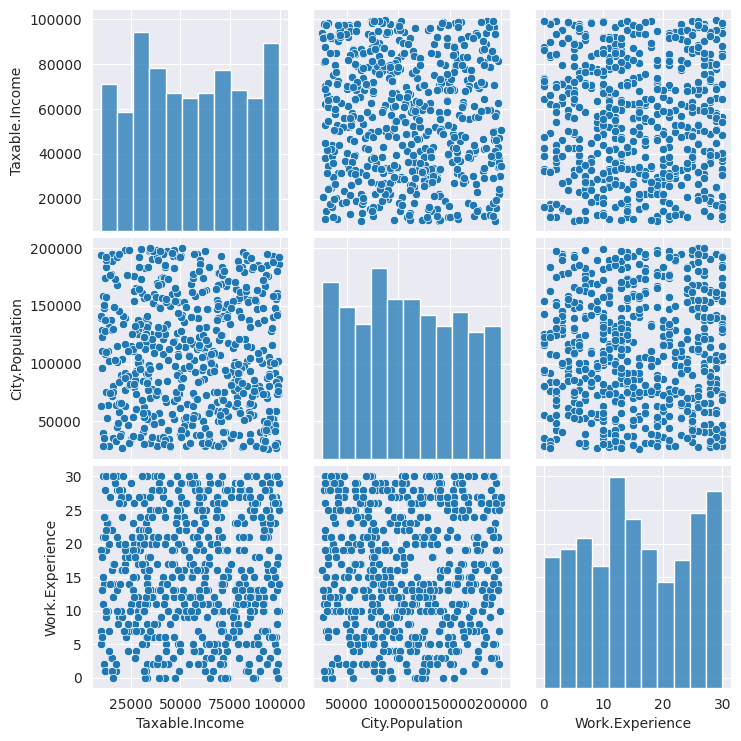

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')
sns.pairplot(df)



In [33]:
# Lebel Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [34]:
for i in range(0, 6):
  df.iloc[:, i] = LE.fit_transform(df.iloc[:, i])

<ipython-input-34-435faf51c20e>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, i] = LE.fit_transform(df.iloc[:, i])
<ipython-input-34-435faf51c20e>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, i] = LE.fit_transform(df.iloc[:, i])
<ipython-input-34-435faf51c20e>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iset

In [35]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,387,84,10,1
1,1,0,163,398,18,1
2,0,1,186,481,30,1
3,1,2,272,574,15,1
4,0,1,468,4,28,0


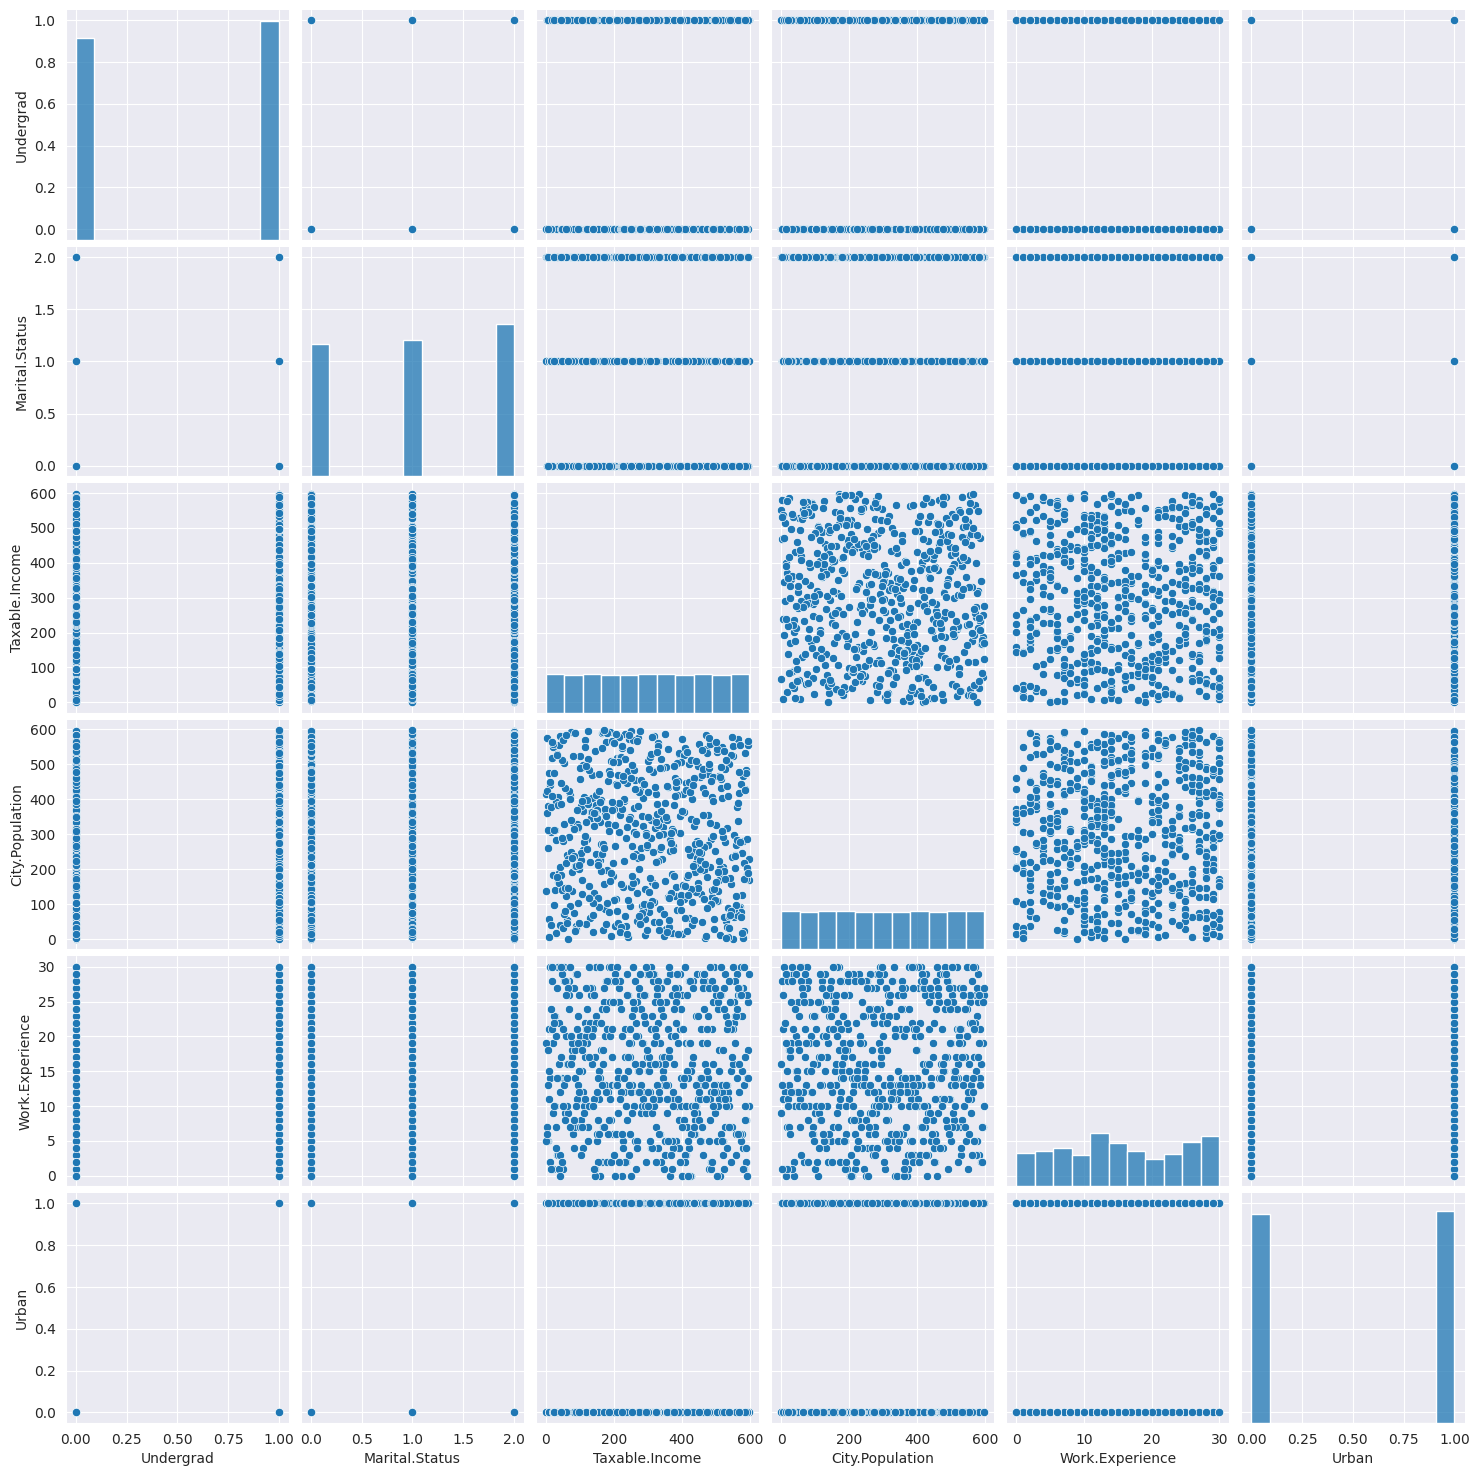

In [36]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [28]:
# Data partition
Y = df_Check["Undergrad"]
X = df_Check.iloc[:,1:6]
X.head()


,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,2,387,84,10,1
1,0,163,398,18,1
2,1,186,481,30,1
3,2,272,574,15,1
4,1,468,4,28,0


In [37]:
# Data partition for X_train and Y_tran data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30)

In [38]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=6)

DT.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(2)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(2)

print(training_accuracy)
print(test_accuracy)

0.7
0.47


In [39]:
training_accuracy = []
test_accuracy = []
Tr = []
Ts = []

In [40]:
# validation set method --> validaton hold-off method
DT = DecisionTreeClassifier(max_depth=11)


for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))

import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))



Average trianing accuray 0.88
Average test accuray 0.5


In [54]:

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

DT.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)
training_error = np.sqrt(mean_squared_error(Y_train,Y_pred_train)).round(3)
test_error = np.sqrt(mean_squared_error(Y_test,Y_pred_test)).round(3)

print("training_error : ",training_error)
print("test_error : ",test_error)
print("Variance: ", (test_error-training_error).round(2))


training_error :  0.0
test_error :  0.683
Variance:  0.68


In [43]:
training_error = []
test_error = []
Tr = []
Ts = []

In [44]:
# validation set method --> validaton hold-off method
DT = DecisionTreeClassifier(max_depth=11)


for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)).round(3))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)).round(3))

import numpy as np
print("Average trianing error",np.mean(training_error).round(2))
print("Average test error",np.mean(test_error).round(2))
print("Variance: ", (np.mean(test_error)-np.mean(training_error)).round(2))



Average trianing error 0.34
Average test error 0.71
Variance:  0.37


In [47]:
# Bagging Regressor
DT = DecisionTreeRegressor()
from sklearn.ensemble import BaggingRegressor
Bag = BaggingRegressor(base_estimator=DT,n_estimators = 100, max_samples = 0.6, max_features=0.7)

In [48]:
training_error = []
test_error = []
Tr = []
Ts = []

In [49]:
# cross validation

for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    Bag.fit(X_train,Y_train)
    Y_pred_train = Bag.predict(X_train)
    Y_pred_test = Bag.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)).round(3))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)).round(3))



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [55]:
import numpy as np
print("Average_trianing_error",np.mean(training_error).round(2))
print("Average_test_error",np.mean(test_error).round(2))
print("Variance: ", (np.mean(test_error)-np.mean(training_error)).round(2))


Average_trianing_error 0.0
Average_test_error 0.68
Variance:  0.68


In [51]:
#  RandomForest
DT = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 200, max_samples = 0.6, max_features=0.7,max_depth=5)

In [52]:
training_error = []
test_error = []
Tr = []
Ts = []

In [53]:
# cross validation

for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    RF.fit(X_train,Y_train)
    Y_pred_train = RF.predict(X_train)
    Y_pred_test = RF.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)).round(3))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)).round(3))

import numpy as np
print("Average trianing error",np.mean(training_error).round(2))
print("Average test error",np.mean(test_error).round(2))
print("Variance: ", (np.mean(test_error)-np.mean(training_error)).round(2))


Average trianing error 0.44
Average test error 0.51
Variance:  0.07


In [ ]:
# Compare with DecisionTreeRegressor, BaggingRegressor and RandomForestRegressor output
# DecisionTreeRegressor
training_error :  0.0
test_error :  0.683
Variance:  0.68

# BaggingRegressor
Average_trianing_error 0.0
Average_test_error 0.68
Variance:  0.68

# RandomForestRegressor
Average trianing error 0.44
Average test error 0.51
Variance:  0.07